In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [4]:
# tree visualization

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)

In [7]:
print(tree_dot)

digraph Tree {
node [shape=box] ;
0 [label="worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]"] ;
1 [label="worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.008\nsamples = 240\nvalue = [1, 239]"] ;
1 -> 2 ;
3 [label="gini = 0.499\nsamples = 19\nvalue = [10, 9]"] ;
1 -> 3 ;
4 [label="worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.497\nsamples = 37\nvalue = [20, 17]"] ;
4 -> 5 ;
6 [label="gini = 0.03\nsamples = 130\nvalue = [128, 2]"] ;
4 -> 6 ;
}


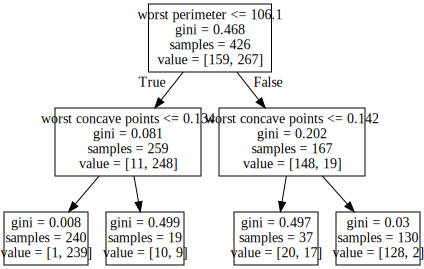

In [8]:
import graphviz
graphviz.Source(tree_dot)

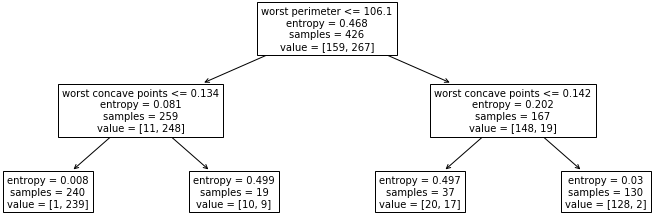

In [9]:
from tree_plotting import plot_tree
plt.figure(figsize=(10, 3))
tree_dot = plot_tree(tree, feature_names=cancer.feature_names)
plt.savefig("tree_plot.png")